# 데이터셋 설명
- 태아 건강과 관련된 레코드
- 'fetal_health'는 3개의 클래스로 분류됨 (1~3)
- Normal, Suspect, Pathological

# train, test 파일 로드

In [23]:
import pandas as pd

train = pd.read_csv('C:/Users/82108/Downloads/train_data.csv')
test = pd.read_csv('C:/Users/82108/Downloads/test_data.csv')

train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,130.0,0.006,0.000,0.006,0.000,0.0,0.0,38.0,1.0,0.0,...,102.0,155.0,6.0,1.0,136.0,135.0,137.0,4.0,0.0,1.0
1,122.0,0.000,0.000,0.001,0.000,0.0,0.0,26.0,1.3,4.0,...,106.0,136.0,1.0,0.0,126.0,122.0,125.0,3.0,0.0,1.0
2,122.0,0.005,0.000,0.006,0.000,0.0,0.0,32.0,1.1,12.0,...,83.0,148.0,2.0,1.0,125.0,125.0,126.0,4.0,0.0,1.0
3,145.0,0.003,0.000,0.006,0.000,0.0,0.0,48.0,0.7,2.0,...,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1.0
4,142.0,0.002,0.054,0.001,0.007,0.0,0.0,64.0,4.0,0.0,...,67.0,210.0,9.0,2.0,142.0,109.0,150.0,54.0,0.0,1.0


# EDA

In [3]:
train.info()
train.describe()

# 결측치 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1690 non-null   float64
 1   accelerations                                           1690 non-null   float64
 2   fetal_movement                                          1690 non-null   float64
 3   uterine_contractions                                    1690 non-null   float64
 4   light_decelerations                                     1690 non-null   float64
 5   severe_decelerations                                    1690 non-null   float64
 6   prolongued_decelerations                                1690 non-null   float64
 7   abnormal_short_term_variability                         1690 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,...,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000
mean,133.364497,0.003182,0.009655,0.004427,0.001884,0.000004,0.000163,47.227219,1.325621,10.313018,...,94.428994,163.846154,4.023669,0.323077,137.501183,134.730178,138.138462,18.465680,0.309467,1.314793
std,9.922061,0.003889,0.047682,0.002945,0.002971,0.000064,0.000601,17.337945,0.894917,18.826518,...,29.677485,17.875201,2.927893,0.700841,16.259961,15.584202,14.506478,27.857271,0.613229,0.624415
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,78.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,95.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,141.000000,0.006000,0.002750,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,12.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,146.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,186.000000,180.000000,183.000000,250.000000,1.000000,3.000000


In [4]:
test.info()
test.describe()

# 결측치 x, label값(fetal_health) x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          423 non-null    float64
 1   accelerations                                           423 non-null    float64
 2   fetal_movement                                          423 non-null    float64
 3   uterine_contractions                                    423 non-null    float64
 4   light_decelerations                                     423 non-null    float64
 5   severe_decelerations                                    423 non-null    float64
 6   prolongued_decelerations                                423 non-null    float64
 7   abnormal_short_term_variability                         423 non-null    float64
 8   mean_value_of_short_term_variability    

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.000000,423.000000,423.000000,423.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,133.066194,0.003213,0.008967,0.004227,0.001969,0.0,0.000144,46.061466,1.372577,7.725768,...,75.002364,90.111111,165.113475,4.290780,0.335697,137.267139,134.078014,137.893617,20.671395,0.354610
std,9.499582,0.003805,0.043166,0.002920,0.002944,0.0,0.000551,16.509397,0.840872,16.089662,...,39.060319,28.874454,18.208154,3.038939,0.735574,16.976204,15.722446,14.383888,33.322612,0.601752
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.200000,0.000000,...,5.000000,50.000000,125.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.0,0.000000,32.000000,0.800000,0.000000,...,41.000000,65.000000,153.000000,2.000000,0.000000,129.000000,125.000000,129.000000,3.000000,0.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.0,0.000000,46.000000,1.200000,0.000000,...,75.000000,86.000000,163.000000,4.000000,0.000000,140.000000,136.000000,139.000000,8.000000,0.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.0,0.000000,60.000000,1.700000,7.500000,...,103.000000,114.500000,175.000000,6.000000,0.500000,148.000000,144.500000,147.000000,24.500000,1.000000
max,159.000000,0.018000,0.455000,0.012000,0.015000,0.0,0.004000,86.000000,6.000000,84.000000,...,176.000000,158.000000,238.000000,16.000000,8.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

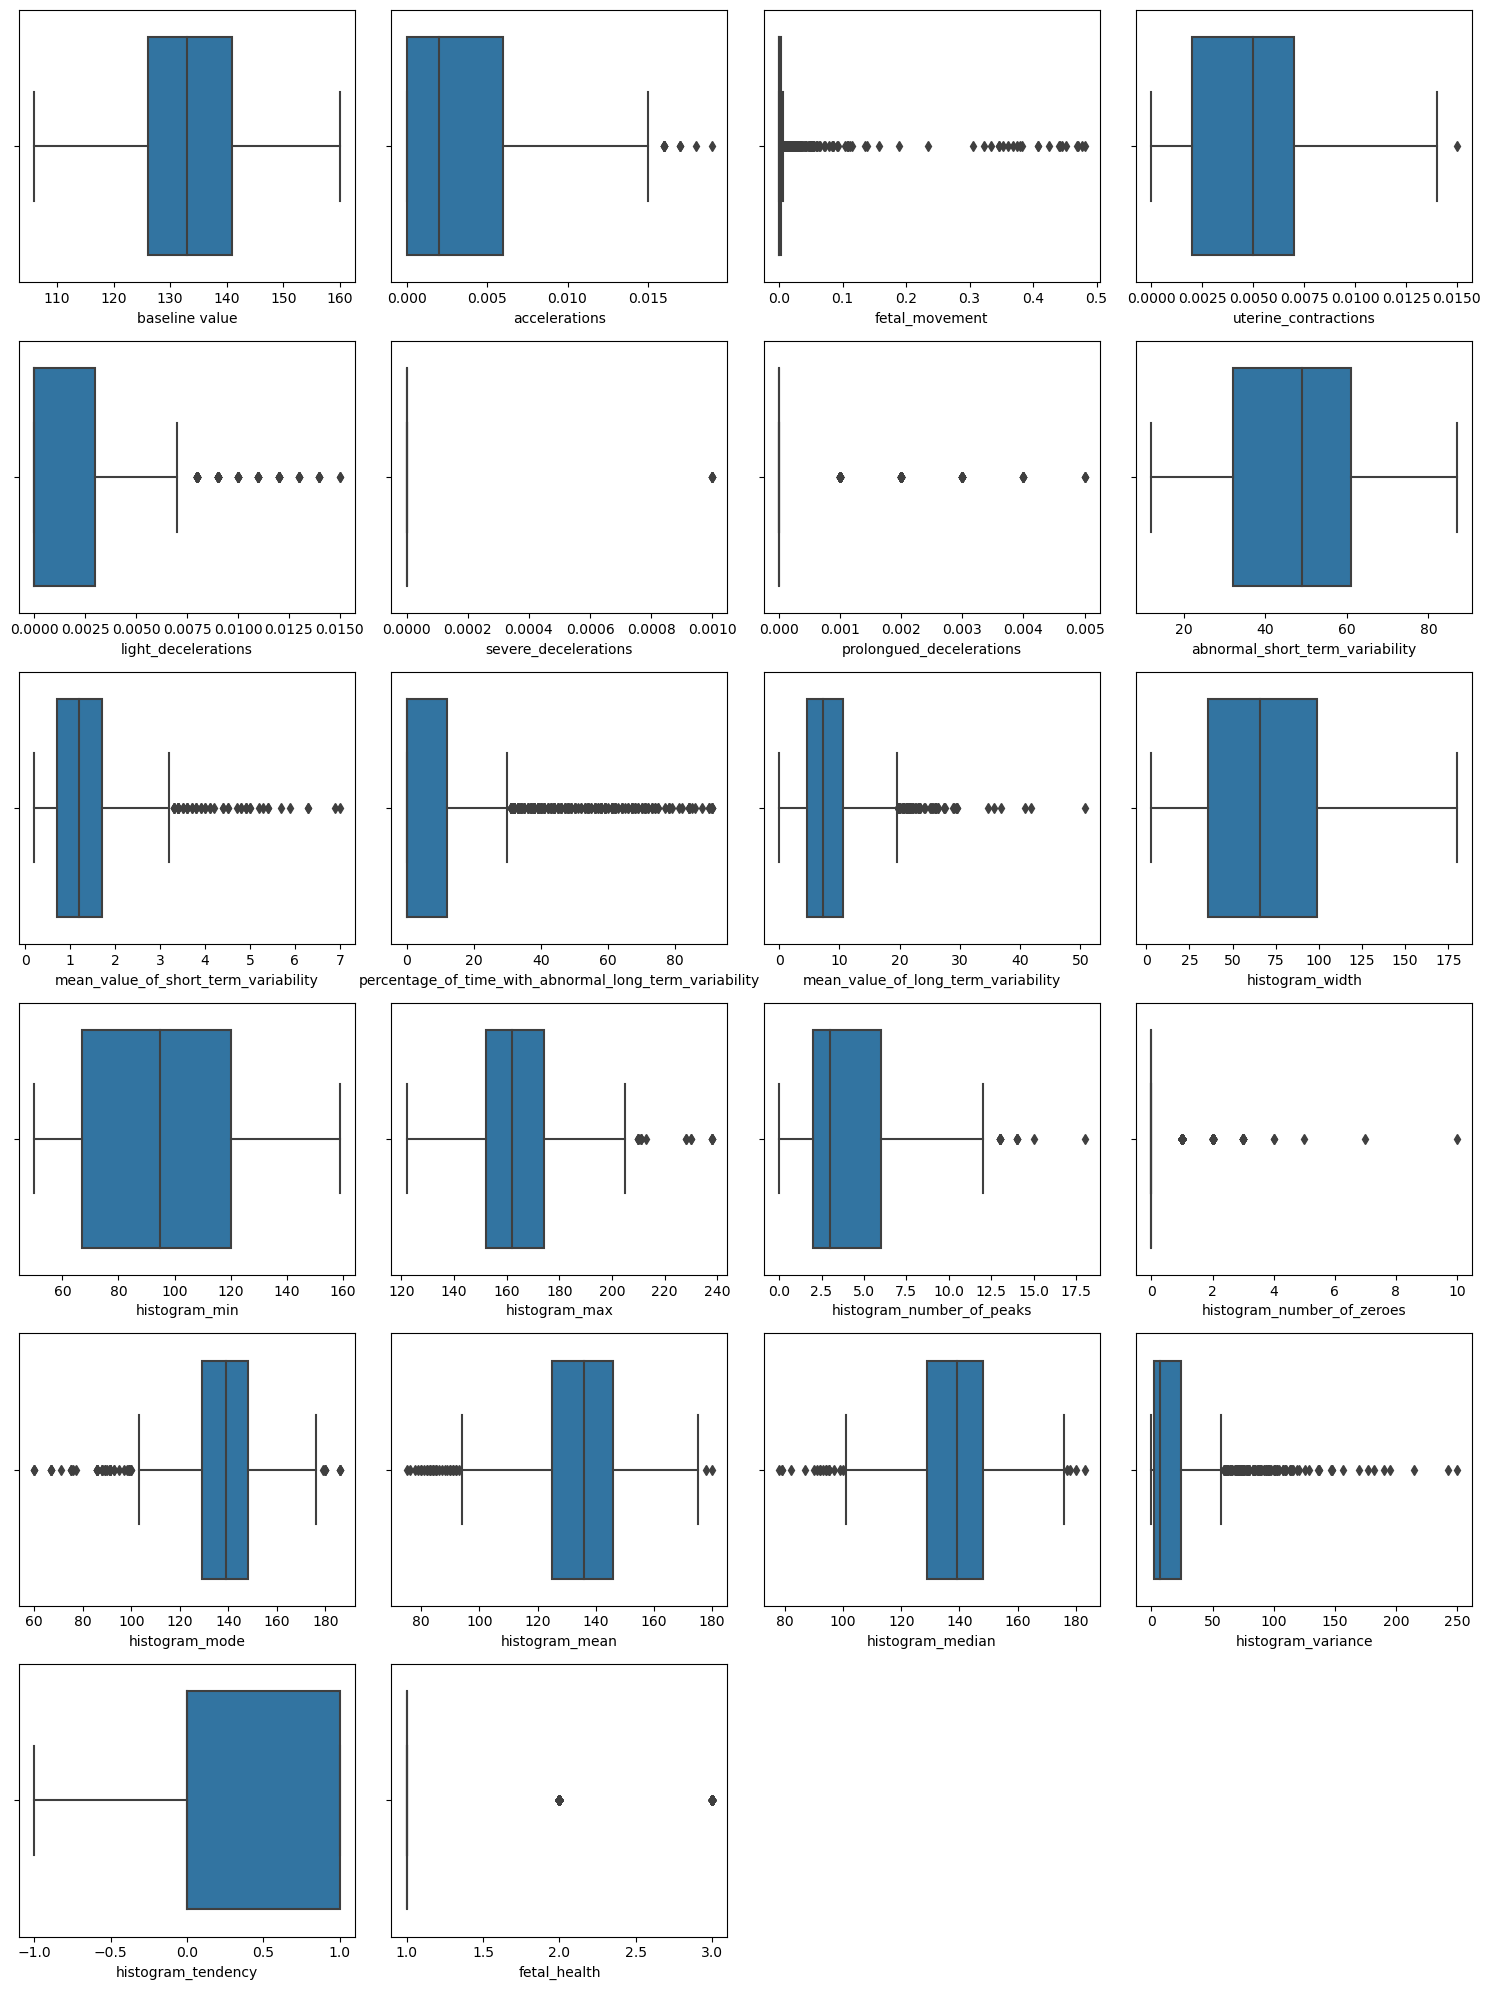

In [10]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# boxplot을 그리세요
for i, column in enumerate(train.columns):
     plt.subplot(6,4,i+1)
     sns.boxplot(x=train[column], ax=axes[i])
for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

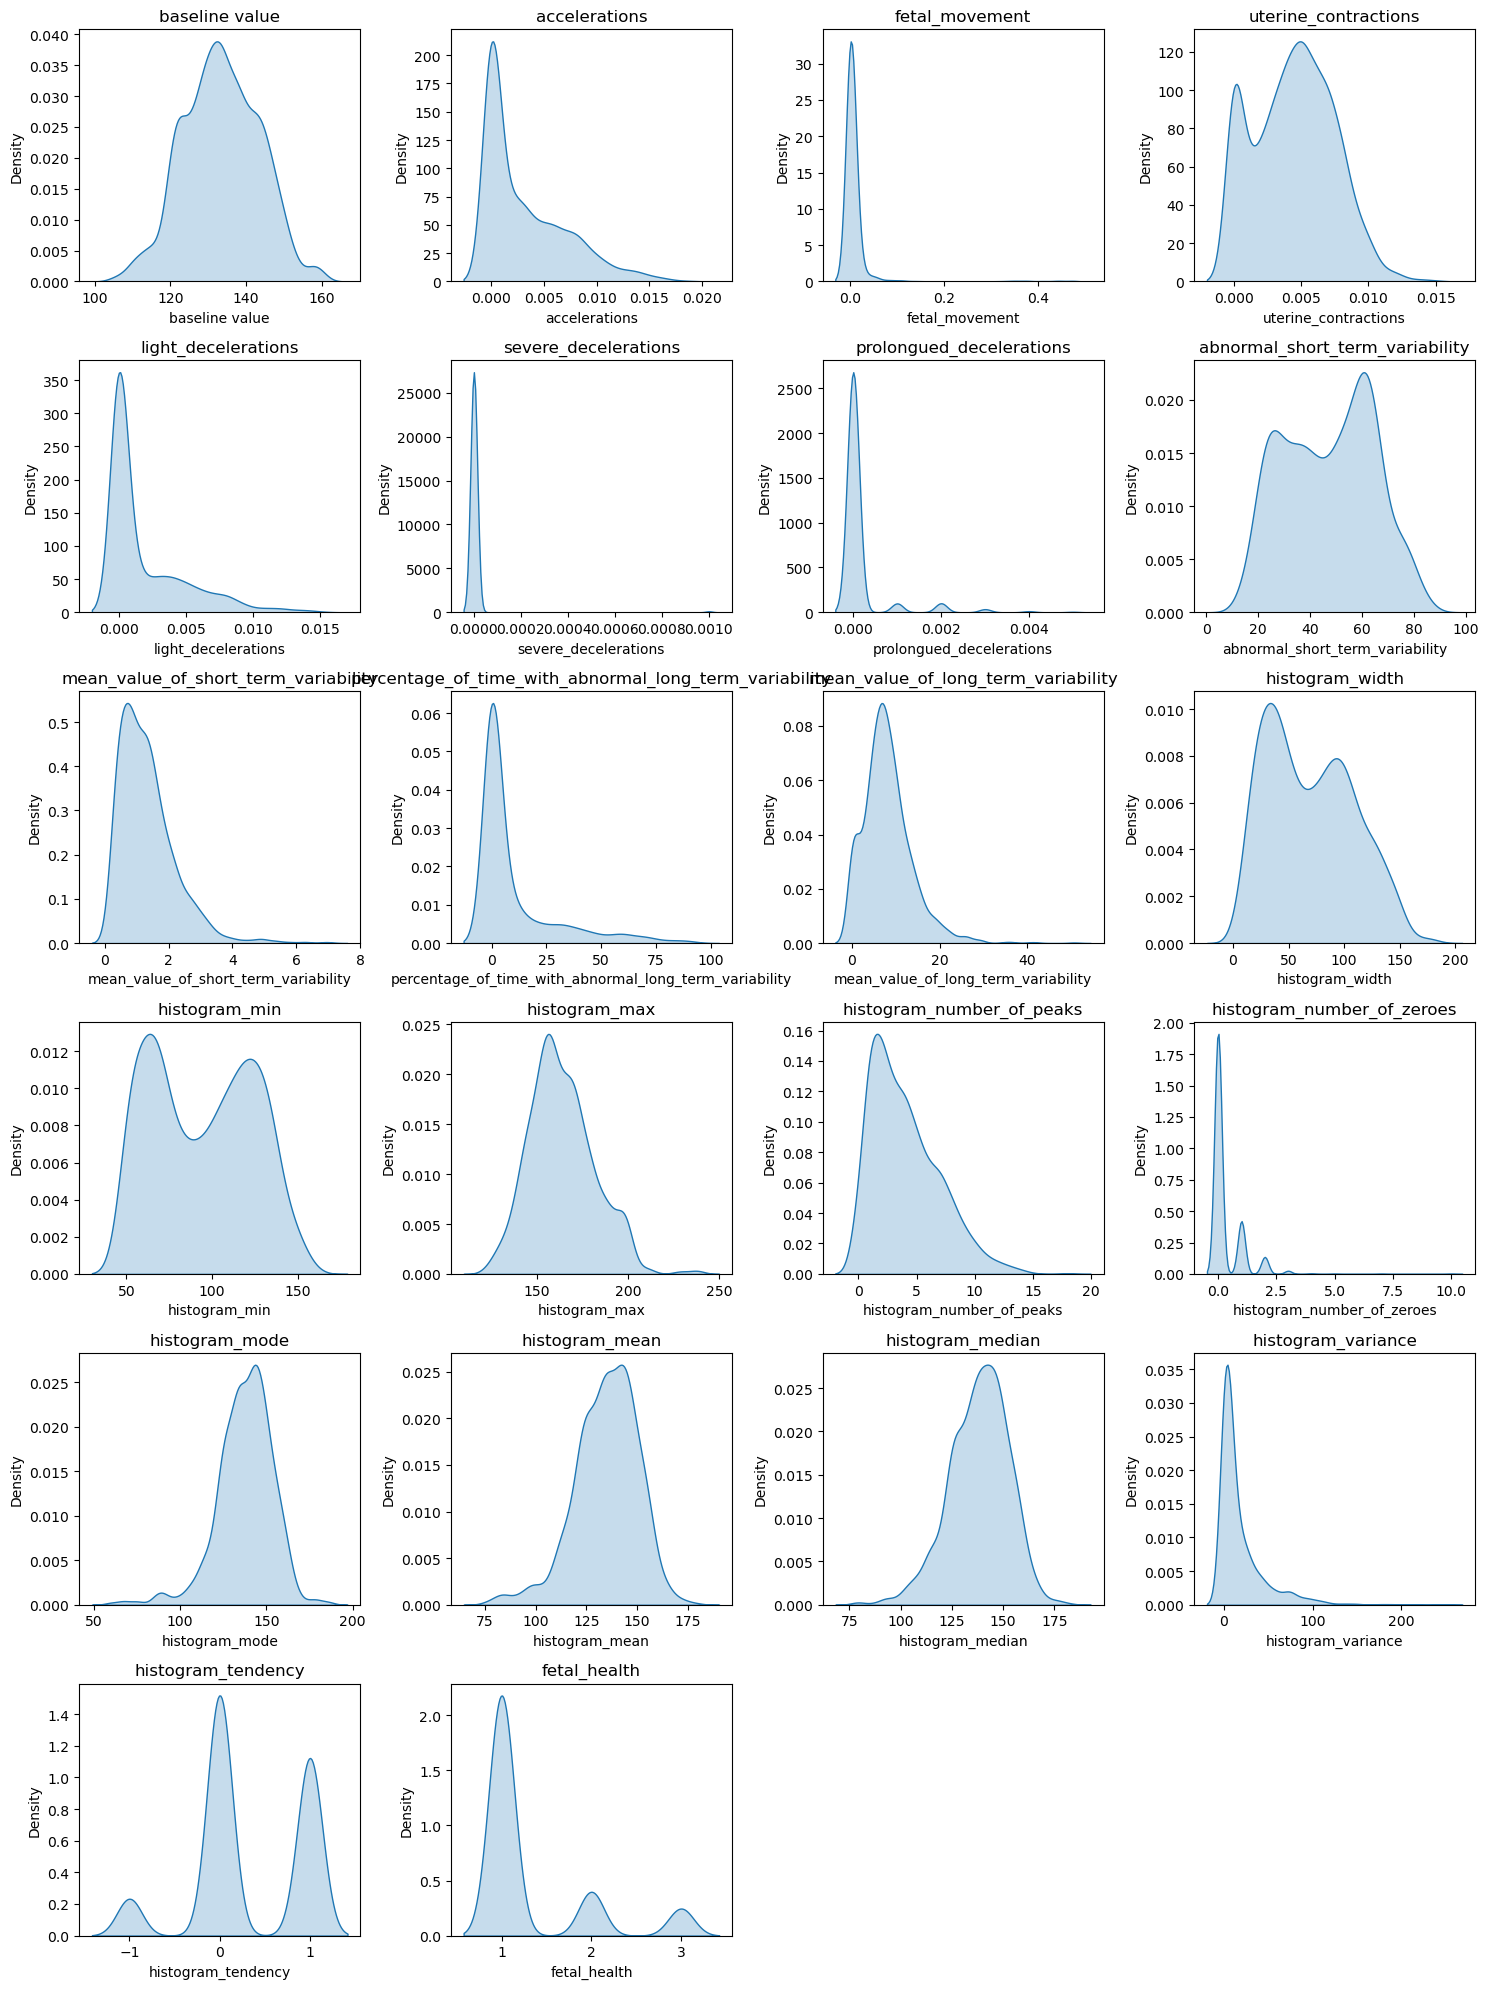

In [7]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# kde plot을 그리세요
for i, column in enumerate(train.columns):
    #for문 활용
  sns.kdeplot(data=train, x=column, ax=axes[i], fill=True)
  axes[i].set_title(column)

for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

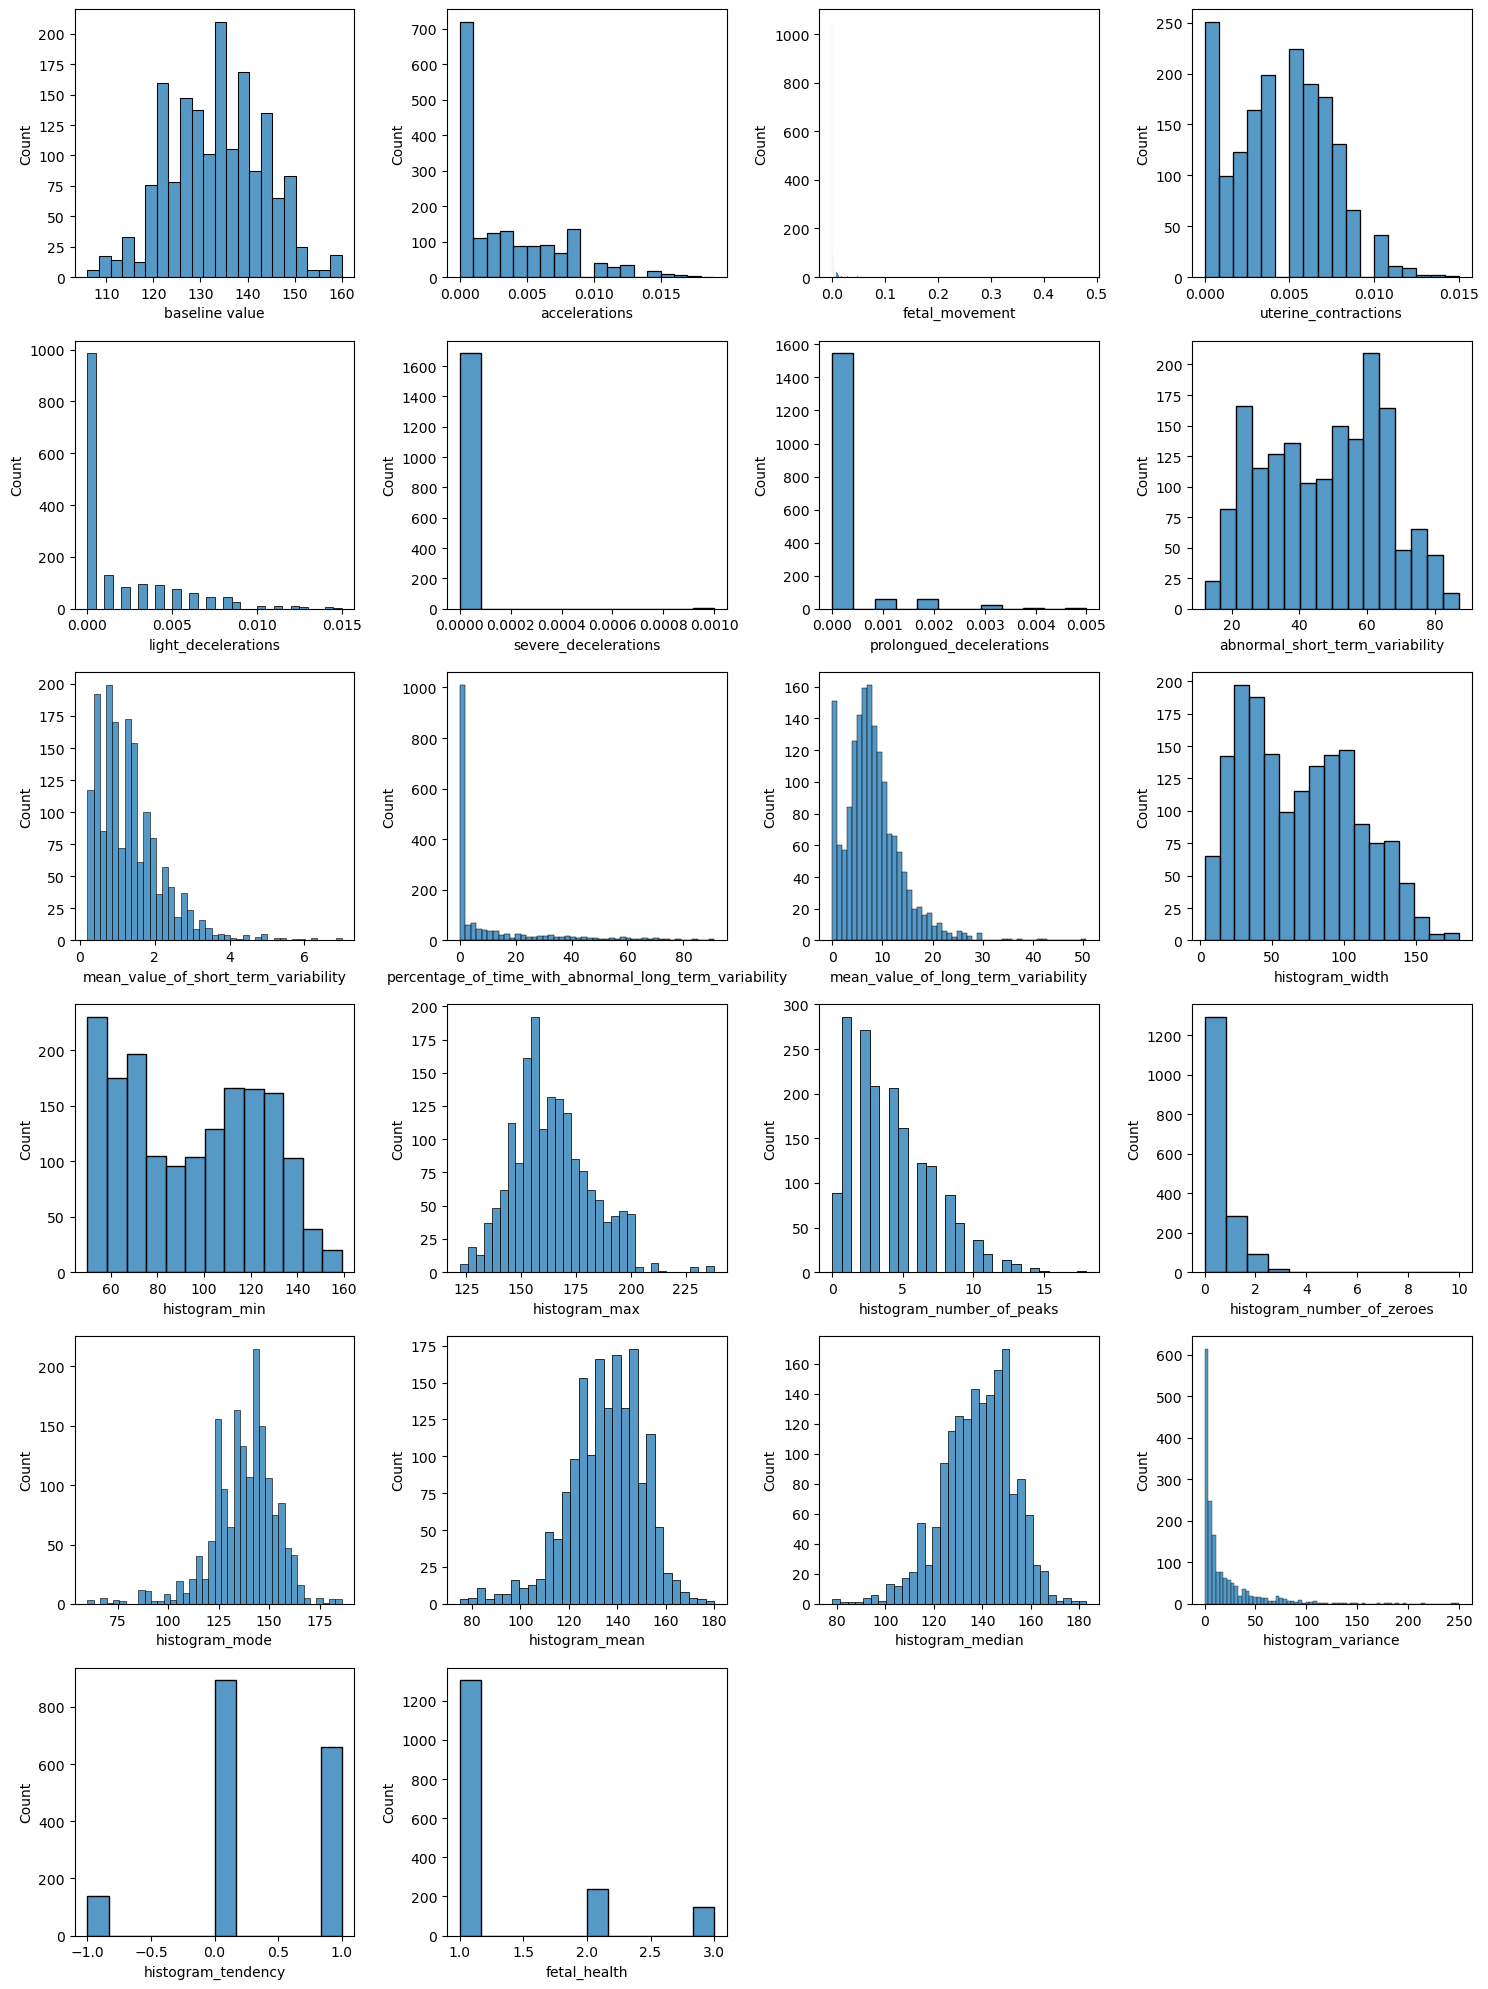

In [11]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# hist plot을 그리세요
for i, column in enumerate(train.columns):
    # for 문 활용
  plt.subplot(6,4,i+1)
  sns.histplot(x=train[column], ax=axes[i])
for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 데이터 전처리
- 중복값
- 인코딩
- 이상치

In [ ]:
# 데이터에 중복값이 있는지 확인하세요
train.duplicated().sum()#코드추가

0

In [12]:
# float 타입의 target 값을 int형으로 변경하세요
train['fetal_health'] = train['fetal_health'].astype(int)

In [22]:
# 이상치 처리를 수행하세요 (선택사항)

def outlier(df):Q1 = 
    df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    line_down = Q1 - 1.5*IQR
    line_up = Q3 + 1.5*IQR
    return df

outlier(train)

SyntaxError: invalid syntax (302468349.py, line 3)

# train - test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop('fetal_health', axis=1)
y = train['fetal_health']
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=123)
print(X_train.shape)
print(y_train.shape)

(1183, 21)
(1183,)


In [15]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 모델링
- random_state = 123 고정 사용
---
- 의사결정나무
- 랜덤포레스트
- KNN
- 서포트벡터머신
- 그라디언트 부스팅
- 로지스틱회귀

- 그리드서치로 파라미터 튜닝


## 의사결정나무

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_clf = DecisionTreeClassifier(random_state = 123)
dt_clf = dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred, average='weighted')
print('Accuracy :', round(accuracy_dt,4))
print('f1-score :', round(f1_dt,4))

Accuracy : 0.8797
f1-score : 0.8813


In [17]:
# 의사결정나무 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params= {
    'max_depth': [2,4,6,8],
    'min_samples_split': [3,5,10],
    'min_samples_leaf': [1,2,7]
} #원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123), param_grid= params, cv=5)
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
GridSarchCV highest Accuracy: 0.9112426035502958


## 랜덤포레스트

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 123)
rf_clf = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred, average='weighted')
print('Accuracy :', round(accuracy_rf,4))
print('f1-score :', round(f1_rf,4))

Accuracy : 0.929
f1-score : 0.9262


In [21]:
# 랜덤포레스트 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [None, 10, 15, 30],
    'max_leaf_nodes': [None, 50, 100, 200],
    'max_features': [5, 9, 100, 300]
}

#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

grid_cv = GridSearchCV(estimator= RandomForestClassifier(random_state = 123), param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 50}
GridSarchCV highest Accuracy: 0.9270216962524654


## K-Nearest Neighbours (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred, average='weighted')
print('Accuracy :', round(accuracy_knn,4))
print('f1-score :', round(f1_knn,4))

Accuracy : 0.8876
f1-score : 0.882


In [ ]:
# KNN 파라미터 튜닝

params = {'n_neighbors':[1,3,5,7],
         'metric': ['euclidean','manhattan']}
#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

grid_cv = GridSearchCV(estimator=knn, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 4}
GridSarchCV highest Accuracy: 0.893491124260355


## 서포트 벡터 머신 (SVM)


In [33]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 123)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred, average='weighted')
print('Accuracy :', round(accuracy_svm,4))
print('f1-score :', round(f1_svm,4))

Accuracy : 0.9014
f1-score : 0.8959


In [25]:
# SVM 파라미터 튜닝

svm_clf = SVC(random_state=123)
params = {'C':[1.1, 1, 10],
          'kernel':['linear','rbf','poly']}
#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

grid_cv = GridSearchCV(estimator=svm_clf, param_grid=params, cv=10)
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'C': 1, 'kernel': 'poly'}
GridSarchCV highest Accuracy: 0.9171597633136095


## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier(random_state = 123)
g_boost.fit(X_train, y_train)
g_boost_pred = g_boost.predict(X_test)

accuracy_g_boost = accuracy_score(y_test, g_boost_pred)
f1_g_boost = f1_score(y_test, g_boost_pred, average='weighted')
print('Accuracy :', round(accuracy_g_boost,4))
print('f1-score :', round(f1_g_boost,4))

Accuracy : 0.9408
f1-score : 0.9398


In [29]:
# 그라디언트 부스팅 파라미터 튜닝
param_grid = {
    'n_estimators': [10,150,250],
    'learning_rate': [0.01,0.1,0.5]
}
#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

grid_search = GridSearchCV(estimator=g_boost, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'C': 1, 'kernel': 'poly'}
GridSarchCV highest Accuracy: 0.9171597633136095


## 로지스틱 회귀

In [30]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 123)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred, average='weighted')
print('Accuracy :', round(accuracy_lr,4))
print('f1-score :', round(f1_lr,4))

Accuracy : 0.8856
f1-score : 0.8803


In [ ]:
# 로지스틱 회귀 파라미터 튜닝 안 함

## Soft Voting Classifier

In [38]:
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(max_depth=10, max_features=5, max_leaf_nodes=50)
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=4)
svm_clf = SVC(C=1, kernel='poly', probability=True) #오류 방지
g_boost = GradientBoostingClassifier()

voting_clf=VotingClassifier(estimators=[
    ('dt', dt_clf),
    ('lr', lr_clf),
    ('rf', rf_clf),
    ('knn', knn),
    ('svm', svm_clf),
    ('g_boost', g_boost)
], voting='soft')
voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
for clf in (lr_clf, rf_clf, dt_clf,knn,svm_clf, g_boost):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,pred))

LogisticRegression 0.8856015779092702
RandomForestClassifier 0.9250493096646942
DecisionTreeClassifier 0.9013806706114399
KNeighborsClassifier 0.893491124260355
SVC 0.9171597633136095
GradientBoostingClassifier 0.9408284023668639


In [39]:
# Soft Voting Result
pred=voting_clf.predict(X_test)
print("Voting Accuracy Score :{0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Voting Accuracy Score :0.9487
F1 score of model : 0.9041


# 결과 비교

In [40]:
models = ["Decision Tree", "Random Forest", "KNN", "SVM", "Gradient Boosting", "Logistic Regression"]
accuracy = [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_g_boost, accuracy_lr]
f1_score =[f1_dt, f1_rf, f1_knn, f1_svm, f1_g_boost, f1_lr]

summary_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "F1 score" : f1_score
})
summary_table.round(3)

,Model,Accuracy,F1 score
0,Decision Tree,0.880,0.881
1,Random Forest,0.929,0.926
2,KNN,0.888,0.882
3,SVM,0.901,0.896
4,Gradient Boosting,0.941,0.940
5,Logistic Regression,0.886,0.880


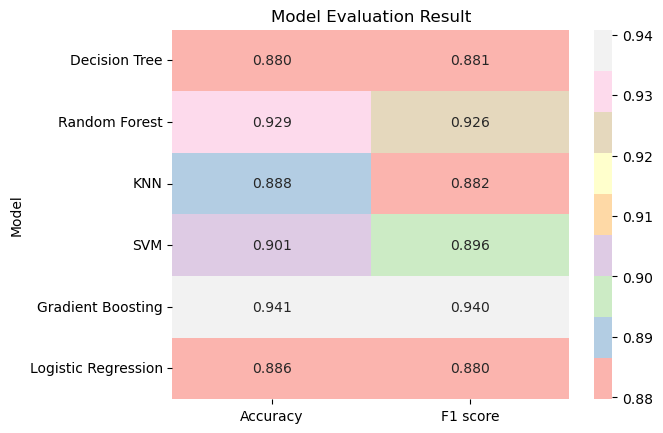

In [41]:
sns.heatmap(data=summary_table.set_index('Model').iloc[:,:], annot=True, fmt='.3f', cmap='Pastel1')
plt.title('Model Evaluation Result')
plt.show()

# 결론
- 튜닝 전후로 어떤 모델이 성능이 좋았는지 결론 작성
Voting Accuracy Score :0.9487
그래디언트부스트의 성능이 가장 좋았다